In [39]:
#Importo le librierie di cui necessito

import tweepy                            #Tweepy è il modulo che uso per svolgere l'operazione di scraping dei tweets. 
import configparser                      #Configparser è il modulo che uso per "leggere" il file "ini" nel quale costudisco le api di Twitter.
import pandas as pd                      #Utilizzo Pandas per creare dataframe.
from textblob import TextBlob            #TextBlob è il modulo che ho scelto per svolgere le operazioni di SA.
import re                                #Re è il modulo che utilizzo per "pulire" i tweets.
import matplotlib.pyplot as plt          #Plt è il modulo che uso per ottenere i grafici finali.
plt.style.use('fivethirtyeight')

In [40]:
#Leggo il file ".ini" dove costudisco le api del mio account Twitter

config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = 'KQUF0EeovGT7eZHWtPOIR7sdbvyKk9OEpRuOaShuGLwHG'

In [41]:
#Autorizzo Tweepy ad accedere al mio Account Twitter tramite le mie chiavi di accesso

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [42]:
#Semplice test per verificare che i codici precedenti funzionano, in questo caso stampo la mia home di Twitter

public_tweets = api.home_timeline()

for tweet in public_tweets:
  print(tweet.text)

Una donna ritrova l'uso delle mani grazie a protesi di ultima generazione

#ANSA https://t.co/zQHIzbajxc
Blog | Videogiochi, 3 developer racconta le sfide di un mondo maschile - Alley Oop https://t.co/Xso4fc4vRV https://t.co/0R2js1xpER
Il Colibrì di Francesca Archibugi aprirà la Festa del Cinema di Roma 

#ANSA https://t.co/DELdh78sEn
Trenta ore di coda e 16 chilometri: l’abbraccio di Londra a Elisabetta https://t.co/Qjbl8nKZQu
PNRR e riforme, come procederà il nuovo Governo? - Il Sole 24 ORE https://t.co/7QkN47LI9t https://t.co/UovA5UO9sR
Andrew Parker, il Lord Ciambellano venuto dai Servizi segreti britannici [dalla nostra inviata Anna Lombardi] https://t.co/CthW3zdvOn
Milan-Dinamo Zagaria, fermati e denunciati 14 ultras croati: avevano coltelli e bastoni https://t.co/NXEvhm10gr
Incidenti sul lavoro, operaio Fincantieri travolto da una lastra ad Ancona. Grave un lavoratore ustionato a Torino https://t.co/kkcQPajU8f
Rifiuti: il Pnrr e la sfida della differenziata in Sicilia. Via ad "A

In [43]:
#Definisco il termine a cui sono interessato così da ottenere solo Tweets inerenti e definisco quanti ne voglio

keyword = 'italian elections -filter:retweets'
amount = 200000

In [44]:
#La vera e propria operazione di scraping tramite Tweepy: definisco la query, la lingua, il periodo di tempo e il numero di tweets che voglio

tweets = tweepy.Cursor(api.search, q=keyword, lang='en', since='2022-08-01', tweet_mode='extended').items(amount)

all_tweets = [tweet.full_text for tweet in tweets]

In [45]:
#Creo un dataframe con i risultati precedenti e come test mostro i primi 5 

df = pd.DataFrame(all_tweets, columns=['Tweets'])

df.head(5)

,Tweets
0,#ICYMI 🔊: A rightist coalition is poised to wi...
1,Sadly I still haven't received the voting card...
2,What else can you talk about if you have to gi...
3,"@blurofficial \n""Charmless man"": the best soun..."
4,@JuttaPaulusRLP @daniel_freund @SkaKeller @Man...


In [46]:
#Creo una funzione nella quale definisco alcuni parametri che non voglio nel risultato finale ed eseguo una "pulizia" dei tweets

def cleanTwt(twt):
  twt = re.sub('#', '', twt)
  twt = re.sub('@', '', twt)
  twt = re.sub(' @', '', twt)
  twt = re.sub('@[A-Za-z0-9]+', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  
  return twt

In [47]:
#Aggiungo al dataframe i tweets "puliti" e verifico mostrando i primi 5

df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)

df.head()

,Tweets,Cleaned_Tweets
0,#ICYMI 🔊: A rightist coalition is poised to wi...,ICYMI 🔊: A rightist coalition is poised to win...
1,Sadly I still haven't received the voting card...,Sadly I still haven't received the voting card...
2,What else can you talk about if you have to gi...,What else can you talk about if you have to gi...
3,"@blurofficial \n""Charmless man"": the best soun...","blurofficial \n""Charmless man"": the best sound..."
4,@JuttaPaulusRLP @daniel_freund @SkaKeller @Man...,JuttaPaulusRLP daniel_freund SkaKeller Manfred...


In [48]:
#Imposto una funzione che analizzi la soggettività dei tweets ottenuti e una che ne studi la polarità, entrambe le applico ai tweet "puliti"

def getSub(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPol(twt):
  return TextBlob(twt).sentiment.polarity

In [49]:
#Aggiungo i risultati appena ottenuti al dataframe

df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSub)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPol)

In [50]:
#Imposto una funzione che, analizzando i risultati di polarità e soggettività, associ i tweets a un risultato positivo, negativo o neutrale

def getSent(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [51]:
#Aggiungo i risultati della funzione precedente al dataframe

df['Sentiment'] = df['Polarity'].apply(getSent)

df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,#ICYMI 🔊: A rightist coalition is poised to wi...,ICYMI 🔊: A rightist coalition is poised to win...,0.250000,0.141667,Positive
1,Sadly I still haven't received the voting card...,Sadly I still haven't received the voting card...,0.500000,-0.250000,Negative
2,What else can you talk about if you have to gi...,What else can you talk about if you have to gi...,0.000000,0.000000,Neutral
3,"@blurofficial \n""Charmless man"": the best soun...","blurofficial \n""Charmless man"": the best sound...",0.133333,0.333333,Positive
4,@JuttaPaulusRLP @daniel_freund @SkaKeller @Man...,JuttaPaulusRLP daniel_freund SkaKeller Manfred...,0.300000,0.300000,Positive


In [55]:
#Mostro tutti i risultati e trasformo il dataframe in un file CSV scaricabile e consultabile

df.head(200)

df.to_csv ('Dataframe.csv', index = False, header=True)

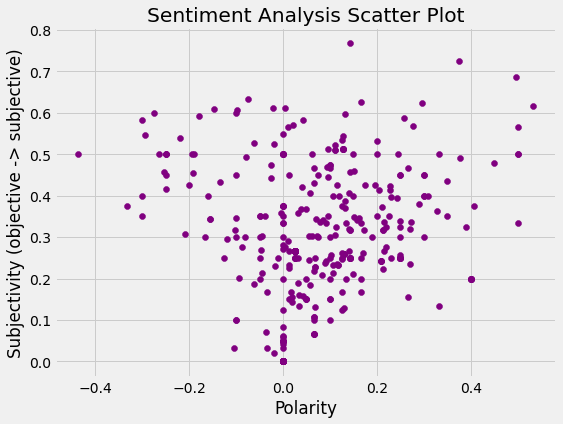

In [53]:
#Imposto e mostro il primo grafico

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

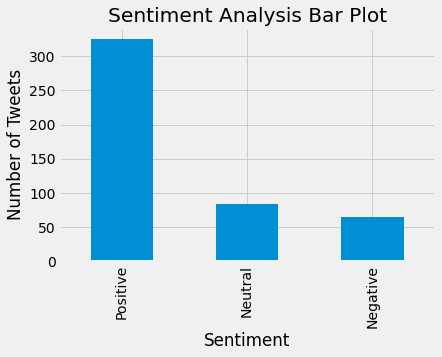

In [72]:
#Imposto e mostro il secondo grafico

df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [56]:
import nltk                            #Modulo che utilizzo per la tokenizzazione            
import spacy                           
from wordcloud import WordCloud       

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')   
nltk.download('wordnet')
nltk.download('maxent_ne_chunker') 
nltk.download('words')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.tokenize import SpaceTokenizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [57]:
with open('Dataframe.csv', 'r') as f_in, open('my_file.txt', 'w') as f_out:
  content = f_in.read()                                                         #Trasformo il file CSV in un file txt
  f_out.write(content)

In [58]:
corpus = open("my_file.txt" , "r").read()         #La stringa "corpus" si riferisce a un file di testo esterno.

tokenized_in_sent=sent_tokenize(corpus)           #Segmento il testo in frasi.
tokenized_in_word=word_tokenize(corpus)           #Segmento il testo in parole.
stop_words=set(stopwords.words("english"))        #Definisco le parole "inutili".

number_of_token = len(tokenized_in_word)   

print("Number of tokens: ", number_of_token)      #Conto i token totali del corpus.

filtered_sent=[]                                  #Aggiungo alla lista "filtered_sent" le parole del corpus non considerate inutili.
for w in tokenized_in_word:
    if w not in stop_words:
        filtered_sent.append(w)

Number of tokens:  40275


In [59]:
def remove_punc(string):                          #Imposto la funzione per rimuovere la punteggiatura da una lista di tokens.
    punc = '''!()-[]{};:'"\,<>./?@''#$%^&*_~'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string                              

In [60]:
filtered_sent = [remove_punc(i) for i in filtered_sent]  #Rimuovo la punteggiatura dalla lista di tokens.
filtered_sent = [x.strip(' ') for x in filtered_sent]    #Rimuovo gli spazi vuoti dalla lista di tokens.

In [61]:
number_of_filtered_token = len(filtered_sent)            #Conto i token del corpus "pulito".

print("Numero Token: ", number_of_filtered_token)

Numero Token:  31088


In [62]:
vb = list(dict.fromkeys(filtered_sent))
print(vb)                               #Rimuovo dalla lista "filtered_sent" le ripetizioni creando un dizionario.

vocabulary = len(vb)
print("Numero Token: ", vocabulary)     #Conto gli elementi del dizionario.

['Tweets', '', 'CleanedTweets', 'Subjectivity', 'Polarity', 'Sentiment', 'ICYMI', '🔊', 'A', 'rightist', 'coalition', 'poised', 'win', 'Italian', 'general', 'elections', 'month', 'In', 'episode', 'The', 'Exchange', 'Muzinich', '’', 'Fabrizio', 'Pagani', 'joins', 'LJucca', 'discuss', 'next', 'executive', 'immediate', 'economic', 'challenges', 'Listen', '👉', 'https', 'tcorigGtcUCAT', 'tcoHRSwr2R7RX', '``', '02501416666666666667', 'Positive', 'Sadly', 'I', 'still', 'nt', 'received', 'voting', 'card', 'upcoming', 'Italians', 'Poland', 'share', 'experience', 'Warsaw', 'embassy', '05', '025', 'Negative', 'What', 'else', 'talk', 'give', 'plenary', 'address', 'Swedish', 'tcowHn0KdHB7v', '0000', 'Neutral', 'blurofficial', 'Charmless', 'man', 'best', 'soundtrack', 'political', 'ElezioniPolitiche2022', '01333333333333333303333333333333333', 'JuttaPaulusRLP', 'danielfreund', 'SkaKeller', 'ManfredWeber', 'Meddling', 'intern', 'Germans', 'know', 'perfectly', 'since', 'centuries', 'Do', 'really', 'thi

In [63]:
lmtzr = WordNetLemmatizer()
lemmatized = [[lmtzr.lemmatize(word) for word in word_tokenize(s)]
              for s in vb]
print(lemmatized)

lemmm = len(lemmatized)

print("Numero Token: ", lemmm)         #Lemmatizzo i token presenti nel dizionario.

[['Tweets'], [], ['CleanedTweets'], ['Subjectivity'], ['Polarity'], ['Sentiment'], ['ICYMI'], ['🔊'], ['A'], ['rightist'], ['coalition'], ['poised'], ['win'], ['Italian'], ['general'], ['election'], ['month'], ['In'], ['episode'], ['The'], ['Exchange'], ['Muzinich'], ['’'], ['Fabrizio'], ['Pagani'], ['join'], ['LJucca'], ['discus'], ['next'], ['executive'], ['immediate'], ['economic'], ['challenge'], ['Listen'], ['👉'], ['http'], ['tcorigGtcUCAT'], ['tcoHRSwr2R7RX'], ['``'], ['02501416666666666667'], ['Positive'], ['Sadly'], ['I'], ['still'], ['nt'], ['received'], ['voting'], ['card'], ['upcoming'], ['Italians'], ['Poland'], ['share'], ['experience'], ['Warsaw'], ['embassy'], ['05'], ['025'], ['Negative'], ['What'], ['else'], ['talk'], ['give'], ['plenary'], ['address'], ['Swedish'], ['tcowHn0KdHB7v'], ['0000'], ['Neutral'], ['blurofficial'], ['Charmless'], ['man'], ['best'], ['soundtrack'], ['political'], ['ElezioniPolitiche2022'], ['01333333333333333303333333333333333'], ['JuttaPaulusR

In [64]:
string = ' '.join([str(item) for item in filtered_sent ])  #Trasformo la lista "filtered_sent" in una stringa.
names = [] 


for word,pos in nltk.pos_tag(nltk.word_tokenize(str(string))):
         if (pos == 'NN'):
             names.append(word)
print(names)                             #Aggiungo alla lista "names" i token considerati come nomi presenti nella stringa "string".

['coalition', 'month', 'executive', 'https', 'tcoHRSwr2R7RX', 'coalition', 'month', 'executive', 'voting', 'card', 'share', 'experience', 'embassy', 'voting', 'card', 'share', 'experience', 'talk', 'address', 'talk', 'address', 'man', 'soundtrack', 'man', 'soundtrack', 'danielfreund', 'danielfreund', 'vote', 'election', 'none', 'solution', 'energy', 'crisis', 'https', 'tcoczDpjGg693', 'vote', 'election', 'none', 'solution', 'energy', 'crisis', 'election', 'month', 'https', 'bishop', 'https', 'tcoR3kIGWpfsR', 'election', 'month', 'election', 'month', 'https', 'bishop', 'https', 'tcoJbxuWzvmBf', 'election', 'month', 'president', 'president', 'game', 'populist', 'game', 'interface', 'hypocrisy', 'https', 'tcoEpfskaRRvH', 'interface', 'hypocrisy', 'anything', 'life', 'anything', 'party', 'part', 'campaign', 'afpphoto', 'https', 'party', 'part', 'campaign', 'afpphoto', 'downtoearth', 'assessment', 'tcoCtDuBagvWD', 'downtoearth', 'assessment', 'xkcd', 'extreme', 'right', 'scenario', 'extreme

In [65]:
frequency = FreqDist(names)
frequency.most_common(50)      #Stampo la frequenza dei 50 nomi più ripetuti nel corpus.

[('https', 353),
 ('month', 270),
 ('election', 263),
 ('bishop', 105),
 ('coalition', 54),
 ('vote', 51),
 ('government', 47),
 ('party', 46),
 ('country', 38),
 ('s', 36),
 ('amp', 32),
 ('votate', 24),
 ('way', 22),
 ('crisis', 20),
 ('time', 20),
 ('voting', 18),
 ('campaign', 18),
 ('right', 16),
 ('power', 16),
 ('week', 16),
 ('situation', 16),
 ('politician', 16),
 ('leader', 16),
 ('discuss', 14),
 ('list', 14),
 ('news', 14),
 ('war', 14),
 ('energy', 13),
 ('question', 12),
 ('support', 12),
 ('bank', 12),
 ('state', 12),
 ('inflation', 12),
 ('year', 12),
 ('frontrunner', 12),
 ('money', 11),
 ('gt', 11),
 ('executive', 10),
 ('part', 10),
 ('majority', 10),
 ('outlook', 10),
 ('world', 10),
 ('todo', 10),
 ('minister', 10),
 ('candidate', 10),
 ('place', 10),
 ('law', 10),
 ('day', 10),
 ('case', 10),
 ('delay', 10)]

In [66]:
nouns_number = len(names)

print("Number of nouns: ", nouns_number)    #Conto i token considerati come nomi.

Number of nouns:  3938


In [67]:
noundictionary = list(set(names))
                                    #Creo un dizionario di soli nomi 
print(noundictionary) 

['vitodepalma\u2069', 'benefit', 'tcod4tijIQxYd', 'campaign', 'sell', 'ulrichspeck', 'tcoOiyfVINHWy', 'dissolvi', 'surprise', 'interference', 'months025025', 'bamboo', 'respond', 'peak', 'company', 'realm', 'yall', 'party—we', 'tcoMCnZgQjao5', 'sonia', 'meeting', 'round', 'dictator', 'solution', 'tcoDo7X6zP2hR', 'tcoZGiOTRQ9tN', 'tcoyYZwclTsUj', 'tco68fkrKwUGD', 'sisp', 'episode', 'italianiincanada', 'nicolaorlando', 'juliejacques67', 'hate', 'tconnyUXDFZMy', 'spread', 'tconFcwH2IZgm', 'controcorrente', 'card', 'andreacantelmo8', 'antiromani', 'tcoPItXosWXvT', 'changer', 'role', 'hole', 'tcoO1ibZWRcUb', 'tco7pQQJ79tvC', 'propaganda', 'tcoQvqxpXUUCT', 'conflict', 'embassy', 'scenario', 'question', 'tcowXZil30U8D', 'cl…', 'tcoOujTLpYqy5', 'tcofbGOt4rrLe', 'exxxxxxxtreme', 'shame', 'tcoIfxdzusBFT', 'brutality', 'tco4PFVbLFuCt', 'debate', 'threat', 'truss', 'insurance', 'tcowwJc9GxyZK', 'tcoJ98HKGUZTo', 'electionsUS', 'tcoVvDBNtxl9o', 'centreright', 'dire', 'middle', 'shore', 'tco83UjOWenG

In [68]:
dictionary_total= len(noundictionary)
                                                  #Conto gli elementi del nuovo dizionario
print("Nouns in the corpus: ", dictionary_total)   

Nouns in the corpus:  1015


In [69]:
spacy_nlp  = spacy.load('en_core_web_sm')

                    
doc = spacy_nlp(corpus.strip())
text = " "
                    
named_entities = []

for i in doc.ents:
 entry = str(i.lemma_).lower()
 text = text.replace(str(i).lower(), "")            #Tra i nomi cerco i soli nomi propri
 if i.label_ in ["ART", "EVE", "NAT", "PERSON"]:
  named_entities.append(entry.title())

 #Cerco, estraggo e inserisco nella lista "named_entities" i token considerati come nomi propri presenti nel corpus "pilito".

print(named_entities)

['Fabrizio Pagani', 'Fabrizio Pagani', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Unpolitics', 'Meloni', 'Meloni', 'Fabrizio Pagani', 'Fabrizio Pagani', '@Skakeller', 'Putin', 'Putin', '@Gcapoccia1 \nHttps://T.Co/E9Botoqdu7","The', '🇮', 'Gcapoccia1', 'Https://T.Co/8Vi9Idimoj,We', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Please!","Alexzfinley Btw', 'Icymi', 'Fabrizio Pagani', 'Https://T.Co/Riggtcd1Jl","Icymi 🎙', 'Fabrizio Pagani', 'Brexit', 'Brexit', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Vladislav Surkov', 'Vladislav Surkov', 'Vladislav Surkov', 'Vladislav Surkov', 'Vladislav Surkov', 'Vladislav Surkov', 'Lenny', 'Lenny', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Zuppi Of Bologna', 'Fabrizio Pagani', '@Ljucca', 'Fabrizio Pagani', 'Ljucca', 'Fabrizio Pagani', '@Ljucca', '

In [70]:
propernouns = len(named_entities)
print("Numero Token: ", propernouns)           #Conto i token considerati nomi propri.

vbpnouns = list(dict.fromkeys(named_entities)) #Elimino le ripetizioni dalla lista "named_entitties" creando un dizionario di nomi propri.

propernounscount = len(vbpnouns)               #Conto i token unici del dizionario di nomi propri.
print("Numero Token: ", propernounscount)

Numero Token:  542
Numero Token:  147


In [71]:
pnounsfrequency = FreqDist(named_entities)
pnounsfrequency.most_common(50)         #Estraggo e stampo la frequenza dei 50 nomi propri con più ripetizioni.

[('Zuppi Of Bologna', 214),
 ('Fabrizio Pagani', 24),
 ('Putin', 14),
 ('Mussolini', 14),
 ('Salvini', 13),
 ('Meloni', 9),
 ('Brexit', 6),
 ('Vladislav Surkov', 6),
 ('Biden', 6),
 ('Gina Lollobrigida', 6),
 ('Silvio Berlusconi', 5),
 ('Monte Paschi', 5),
 ('🇮🇹', 5),
 ('@Ljucca', 4),
 ('Ljucca', 4),
 ('Giorgia Meloni', 4),
 ('Berlusconi', 4),
 ('@Giorgiameloni', 3),
 ('Lenny', 2),
 ('Adesso Anche Io', 2),
 ('Frateli', 2),
 ('Neo', 2),
 ('Hari Nam Singh', 2),
 ('Elizabeth Death', 2),
 ('Hitler', 2),
 ('Metsola', 2),
 ('Hautala', 2),
 ('Vincenzo Arcobelli', 2),
 ('Schroedinger', 2),
 ('Conte', 2),
 ('Silvioberlusconi', 2),
 ('Trudeau', 2),
 ('Bandar', 2),
 ('Soros', 2),
 ('Schwab', 2),
 ('Knws Hindus', 2),
 ('Raul Vinci', 2),
 ('Trump', 2),
 ('Dighil', 2),
 ('Xi', 2),
 ('Queen Elizabeth', 2),
 ('🤔', 2),
 ('Mario Dragi', 2),
 ('Rahul N Priyanka', 2),
 ('Ben Harnwell', 2),
 ('Avoid Men', 2),
 ('Bannon', 2),
 ('Arlen Specter', 2),
 ('Reagan', 2),
 ('Rai', 2)]